## dfs深度优先

In [2]:
class TreeNode(object):
    def __init__(self,var,left=None,right=None):
        self.var = var
        self.left = left
        self.right = right

class BinaryTree(object):
    def __init__(self,root=None):
        self.root = root

    def preOrder(self,retList,node='root'):  #先序遍历
        if node == 'root':
            node = self.root
        if node != None:
            retList.append(node)
            print ([i.var for i in retList])
            self.preOrder(retList,node.left)
            self.preOrder(retList,node.right)
        return retList

    def inOrder(self,retList,node='root'):  #中序遍历
        if node == 'root':
            node = self.root
        if node != None:
            self.inOrder(retList,node.left)
            retList.append(node)
            print ([i.var for i in retList])
            self.inOrder(retList,node.right)
        return retList

    def postOrder(self,retList,node='root'): #后序遍历
        if node == 'root':
            node = self.root
        if node != None:
            self.postOrder(retList,node.left)
            self.postOrder(retList,node.right)
            retList.append(node)
            print ([i.var for i in retList])
        return retList


if __name__ == '__main__':
    rootNode = TreeNode(1)                  #节点（node）设置
    rootNode.left = TreeNode(2,left=TreeNode(4),right=TreeNode(5))
    rootNode.right = TreeNode(3,right=TreeNode(6))
    binaryTree = BinaryTree(rootNode)
    ret = binaryTree.preOrder([],binaryTree.root)
    for i in ret:                           #打印出依次的遍历过程
        print (i.var,end=" ")
    print("")

    ret = binaryTree.inOrder([],binaryTree.root)
    for i in ret:
        print (i.var,end=" ")
    print("")

    ret = binaryTree.postOrder([],binaryTree.root)
    for i in ret:
        print (i.var,end=" ")


[1]
[1, 2]
[1, 2, 4]
[1, 2, 4, 5]
[1, 2, 4, 5, 3]
[1, 2, 4, 5, 3, 6]
1 2 4 5 3 6 
[4]
[4, 2]
[4, 2, 5]
[4, 2, 5, 1]
[4, 2, 5, 1, 3]
[4, 2, 5, 1, 3, 6]
4 2 5 1 3 6 
[4]
[4, 5]
[4, 5, 2]
[4, 5, 2, 6]
[4, 5, 2, 6, 3]
[4, 5, 2, 6, 3, 1]
4 5 2 6 3 1 

## bfs广度优先

In [3]:
from queue import Queue

class TreeNode(object):
    def __init__(self,var,left=None,right=None):
        self.var = var
        self.left = left
        self.right = right

class BinaryTree(object):
    def __init__(self,root = None):
        self.root = root

    def breathSearth(self):
        if self.root == None:
            return None
        retList = []
        queue = Queue()
        queue.put(self.root)
        while queue.empty() is not True:
            node = queue.get()
            retList.append(node.var)
            if node.left != None:
                queue.put(node.left)
            if node.right != None:
                queue.put(node.right)
        return retList

if __name__ == '__main__':
    rootNode = TreeNode(1)                                        #节点（node）设置
    rootNode.left = TreeNode(2,left=TreeNode(4),right=TreeNode(5))
    rootNode.right = TreeNode(3,right=TreeNode(6))

    tree = BinaryTree(rootNode)
    retList = tree.breathSearth()
    print (retList)


[1, 2, 3, 4, 5, 6]


##### 参考如下：Prim生成迷宫 dfs和bfs走迷宫 _ https://blog.csdn.net/qq_30007885/article/details/104447714?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166000843916781667860566%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166000843916781667860566&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~pc_rank_v38-1-104447714-null-null.142^v39^pc_rank_v38,185^v2^control&utm_term=def%20show_maze%28Maze%29%3A%20%20%20%20%20plt.imshow%28Maze%2C%20cmap%3Dcm.Wistia_r%2C%20interpolation%3Dnone%29%20%20%20%20%20%23%20plt.ion%28%29%20%20%20%20%20plt.show%28%29%20%20%20%20%20def%20find_path_bfs%28image%2C%20M%29%3A%20%20%20%20%20path%20%3D%20np.zeros%28%28num_rows%2C%20num_cols%2C%202%29%29%20%20%20%20%20vis%20%3D&spm=1018.2226.3001.4187

请输入迷宫需要设置的行数: 9
请输入迷宫需要设置的列数: 7


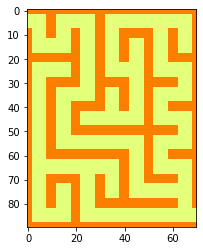

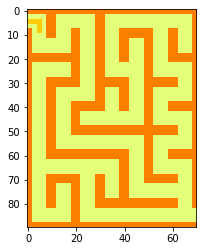

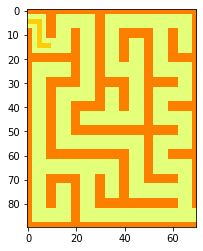

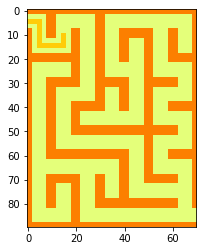

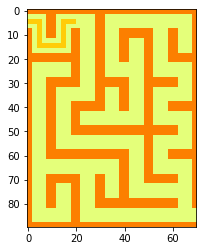

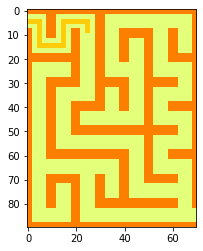

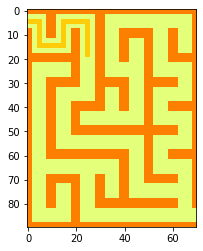

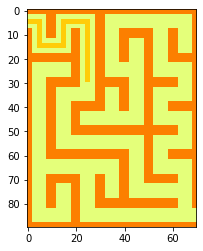

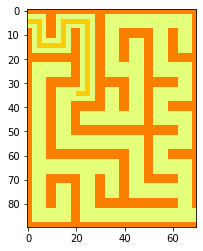

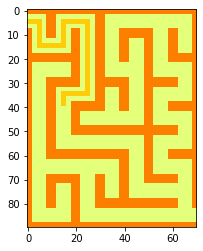

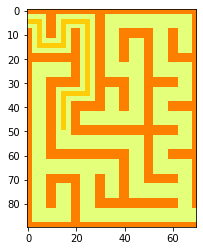

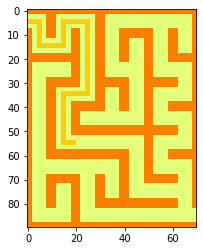

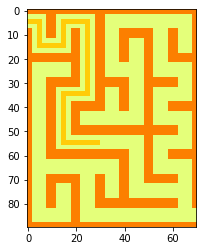

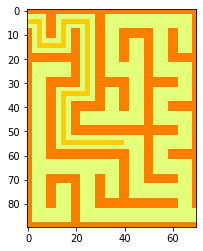

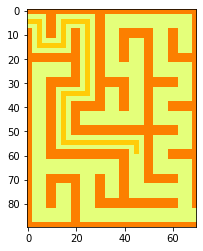

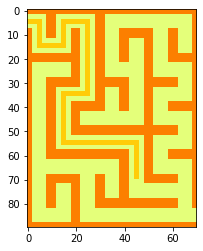

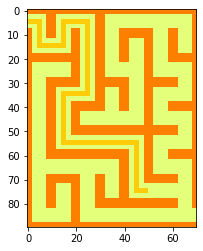

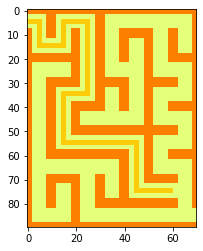

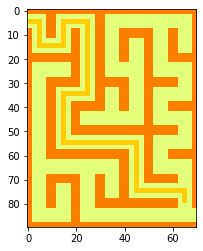

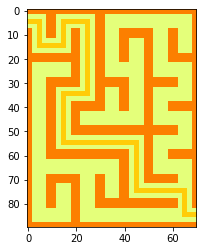

In [8]:
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from collections import deque

#显示地图（图形化显示） 
def show_maze(Maze):
    plt.imshow(Maze, cmap=cm.Wistia_r, interpolation='none')
    plt.show()

#用bfs查找路径    
def find_path_bfs(image, M):                          
    path = np.zeros((num_rows, num_cols, 2))
    vis = np.zeros((num_rows, num_cols))
    vis[0][0] = 1
    Queue = deque()
    Queue.append((0, 0))
    while(Queue):
        temp = Queue.popleft()
        nr = temp[0]
        nc = temp[1]
 
        if (nc == num_cols - 1) and (nr == num_rows - 1):
            show_path(image, path)
            break
        if (nc > 0) and (not vis[nr][nc - 1]) and (M[nr][nc][0]):
            vis[nr][nc] = 1
            Queue.append((nr, nc - 1))
            path[nr][nc - 1][0] = nr
            path[nr][nc - 1][1] = nc
        if (nr > 0) and (not vis[nr - 1][nc]) and (M[nr][nc][1]):
            vis[nr][nc] = 1
            Queue.append((nr - 1, nc))
            path[nr - 1][nc][0] = nr
            path[nr - 1][nc][1] = nc
        if (nc < num_cols - 1) and (not vis[nr][nc + 1]) and (M[nr][nc][2]):
            vis[nr][nc] = 1
            Queue.append((nr, nc + 1))
            path[nr][nc + 1][0] = nr
            path[nr][nc + 1][1] = nc
        if (nr < num_rows - 1) and (not vis[nr + 1][nc]) and (M[nr][nc][3]):
            vis[nr][nc] = 1
            Queue.append((nr + 1, nc))
            path[nr + 1][nc][0] = nr
            path[nr + 1][nc][1] = nc

#用dfs查找路径  
def find_path_dfs(image, M):                    
    path = np.zeros((num_rows, num_cols, 2))
    vis = np.zeros((num_rows, num_cols))
    vis[0][0] = 1
    def dfs(pos):
        nr = pos[0];
        nc = pos[1];
        if (nc == num_cols - 1) and (nr == num_rows - 1):
            show_path(image, path)
            return
        if (nc > 0) and (not vis[nr][nc - 1]) and (M[nr][nc][0]):
            vis[nr][nc] = 1
            path[nr][nc - 1][0] = nr
            path[nr][nc - 1][1] = nc
            dfs((nr, nc - 1))
            vis[nr][nc] = 0
        if (nr > 0) and (not vis[nr - 1][nc]) and (M[nr][nc][1]):
            vis[nr][nc] = 1
            path[nr - 1][nc][0] = nr
            path[nr - 1][nc][1] = nc
            dfs((nr - 1, nc))
            vis[nr][nc] = 0
        if (nc < num_cols - 1) and (not vis[nr][nc + 1]) and (M[nr][nc][2]):
            vis[nr][nc] = 1
            path[nr][nc + 1][0] = nr
            path[nr][nc + 1][1] = nc
            dfs((nr, nc + 1))
            vis[nr][nc] = 0
        if (nr < num_rows - 1) and (not vis[nr + 1][nc]) and (M[nr][nc][3]):
            path[nr + 1][nc][0] = nr
            path[nr + 1][nc][1] = nc
            vis[nr][nc] = 1
            dfs((nr + 1, nc))
            vis[nr][nc] = 0
 
    dfs((0,0))

#dfs方法生成地图    
def Create_maze_dfs():
    M = np.zeros((num_rows, num_cols, 5))
    image = np.zeros((num_rows * 10, num_cols * 10))
 
    r = 0
    c = 0
    history = [(r, c)]
 
    while history:
        M[r, c, 4] = 1
        check = []
        if c > 0 and M[r, c - 1, 4] == 0:
            check.append('L')
        if r > 0 and M[r - 1, c, 4] == 0:
            check.append('U')
        if c < num_cols - 1 and M[r, c + 1, 4] == 0:
            check.append('R')
        if r < num_rows - 1 and M[r + 1, c, 4] == 0:
            check.append('D')
 
        if len(check):
            history.append([r, c])
            move_direction = random.choice(check)
            if move_direction == 'L':
                M[r, c, 0] = 1
                c = c - 1
                M[r, c, 2] = 1
            if move_direction == 'U':
                M[r, c, 1] = 1
                r = r - 1
                M[r, c, 3] = 1
            if move_direction == 'R':
                M[r, c, 2] = 1
                c = c + 1
                M[r, c, 0] = 1
            if move_direction == 'D':
                M[r, c, 3] = 1
                r = r + 1
                M[r, c, 1] = 1
        else:
            r, c = history.pop()
 
    M[0, 0, 0] = 1
    M[num_rows - 1, num_cols - 1, 2] = 1
 
    for row in range(0, num_rows):
        for col in range(0, num_cols):
            cell_data = M[row, col]
            for i in range(10 * row + 2, 10 * row + 8):
                image[i, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[0] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 1] = 255
            if cell_data[1] == 1:
                image[10 * row, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 1, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[2] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 9] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 8] = 255
            if cell_data[3] == 1:
                image[10 * row + 9, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 8, range(10 * col + 2, 10 * col + 8)] = 255
    return M, image
 
#prim算法生成地图
def Create_maze_prim():                        
    M = np.zeros((num_rows, num_cols, 5))
    image = np.zeros((num_rows * 10, num_cols * 10))
 
    r = 0
    c = 0
    history = [(r, c)]
 
    while history:
        r, c = random.choice(history)
        M[r, c, 4] = 1
        history.remove((r, c))
        check = []
 
        if c > 0:
            if M[r, c - 1, 4] == 1:
                check.append('L')
            elif M[r, c - 1, 4] == 0:
                history.append((r, c - 1))
                M[r, c - 1, 4] = 2
        if r > 0:
            if M[r - 1, c, 4] == 1:
                check.append('U')
            elif M[r - 1, c, 4] == 0:
                history.append((r - 1, c))
                M[r - 1, c, 4] = 2
        if c < num_cols - 1:
            if M[r, c + 1, 4] == 1:
                check.append('R')
            elif M[r, c + 1, 4] == 0:
                history.append((r, c + 1))
                M[r, c + 1, 4] = 2
        if r < num_rows - 1:
            if M[r + 1, c, 4] == 1:
                check.append('D')
            elif M[r + 1, c, 4] == 0:
                history.append((r + 1, c))
                M[r + 1, c, 4] = 2
 
        if len(check):
            move_direction = random.choice(check)
            if move_direction == 'L':
                M[r, c, 0] = 1
                c = c - 1
                M[r, c, 2] = 1
            if move_direction == 'U':
                M[r, c, 1] = 1
                r = r - 1
                M[r, c, 3] = 1
            if move_direction == 'R':
                M[r, c, 2] = 1
                c = c + 1
                M[r, c, 0] = 1
            if move_direction == 'D':
                M[r, c, 3] = 1
                r = r + 1
                M[r, c, 1] = 1
 
    M[0, 0, 0] = 1
    M[num_rows - 1, num_cols - 1, 2] = 1
 
    for row in range(0, num_rows):
        for col in range(0, num_cols):
            cell_data = M[row, col]
            for i in range(10 * row + 2, 10 * row + 8):
                image[i, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[0] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 1] = 255
            if cell_data[1] == 1:
                image[10 * row, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 1, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[2] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 9] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 8] = 255
            if cell_data[3] == 1:
                image[10 * row + 9, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 8, range(10 * col + 2, 10 * col + 8)] = 255
    return M, image

#显示路径（图形化） 
def show_path(image, path):
    plt.imshow(image, cmap=cm.Wistia_r, interpolation='none')
    plt.ion()
    plt.pause(2)
    str = ""
    stack = []
    nr = num_rows - 1
    nc = num_cols - 1
    stack.append((nr, nc + 1))
    stack.append((nr, nc))
    while nr or nc:
        tr = nr
        tc = nc
        nr = (int)(path[tr][tc][0])
        nc = (int)(path[tr][tc][1])
        stack.append((nr, nc))
    # stack.append((num_rows, num_cols))
    pr = 0
    pc = 0
    dir = 2
    color_num = 150
    while(stack):
        temp = stack.pop()
        nr = temp[0]
        nc = temp[1]
        if nr or nc:
            if (nr == pr):
                if (nc > pc):
                    # print("R")
                    if (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 10)] = color_num
                    elif (dir == 1):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    elif (dir == 3):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = color_num
                    dir = 2
                else:
                    # print("L")
                    if (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 10)] = color_num
                    elif (dir == 1):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    elif (dir == 3):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = color_num
                    dir = 0
            elif (nc == pc):
                if (nr > pr):
                    # print("D")
                    if (dir == 3):
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    elif (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    elif (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    dir = 3
                else:
                    # print("U")
                    if (dir == 1):
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 5] = color_num
                    elif (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = color_num
                    elif (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = color_num
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = color_num
                    dir = 1
            pr = nr
            pc = nc
            plt.clf()
            plt.imshow(image, cmap=cm.Wistia_r, interpolation='none')
            # plt.ion()
            if (stack):
                plt.ion()
                plt.pause(0.03 / (num_cols * num_rows / 100))
            else:
                plt.ioff()
                plt.show()
                # plt.pause(1000)
 
 
if __name__ == '__main__':
    num_rows = int(input("请输入迷宫需要设置的行数: "))
    num_cols = int(input("请输入迷宫需要设置的列数: "))
 
    path = np.zeros((num_rows, num_cols, 2))
    M = np.zeros((num_rows, num_cols, 5))
    image = np.zeros((num_rows * 10, num_cols * 10))
    # row_image = np.zeros((num_rows * 10, num_cols * 10))
 
    # M, image = Create_maze_prim()
    M, image = Create_maze_dfs()
 
    # show_maze(image)
    # find_path_bfs(image, M)
    find_path_dfs(image, M)
 
    # show_path(image, path)